*Autores: Alex H. Pfoccori Quispe, Milton A. Mozo Davila*

# Regresión Logística, LDA, QDA, y KNN

## El Dato de Stock de Mercado
Iniciaremos examinando algunos resumenes numéricos y gráficos del *Smarket* data, el cual es parte de la librería ISLR. Este conjunto de datos pertenece a los porcentajes de S&P 500 con un index de Stok 1 250 días, desde el inicio del 2001 hasta los finales del 2005.

In [1]:
library(ISLR)
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [2]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

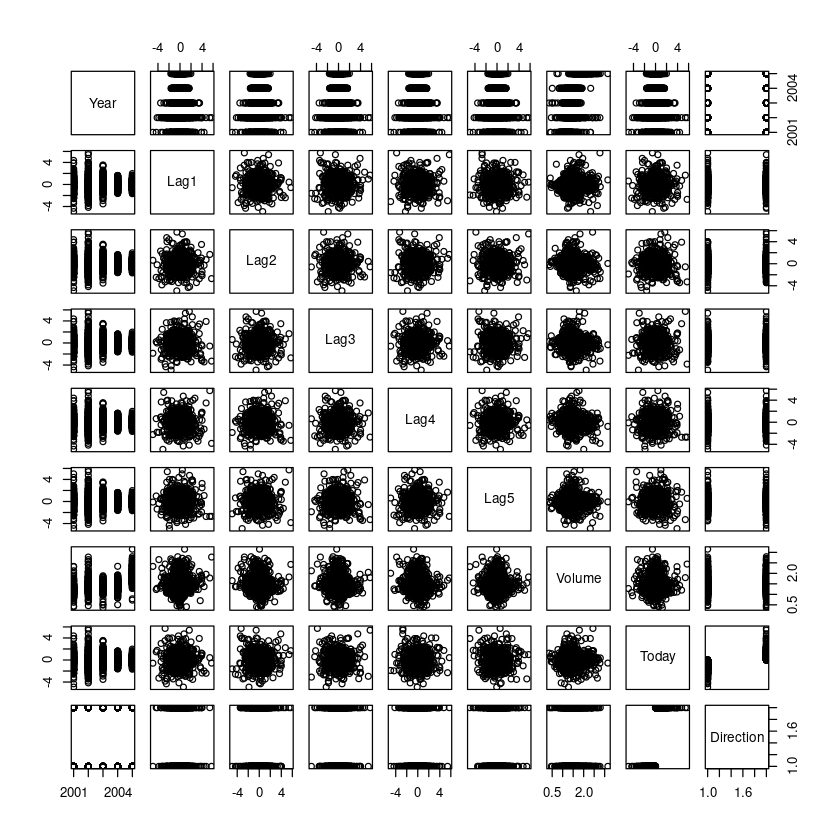

In [3]:
pairs(Smarket)

La función *cor()* produce una matriz que contiene todos los pares de correlación en las predicciones. El primer comando abajo nos da un mensaje de error por que la *Direction* es cualitativa.

In [4]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


Como uno podría esperar, la correlación entre las variables *lag* y *todays* retornar valores muy cercanos a cero. en otras palabras, aquello aparece para ser una correlación pequeña. La correlacion sustancial es entre *Year* y *Volume*.

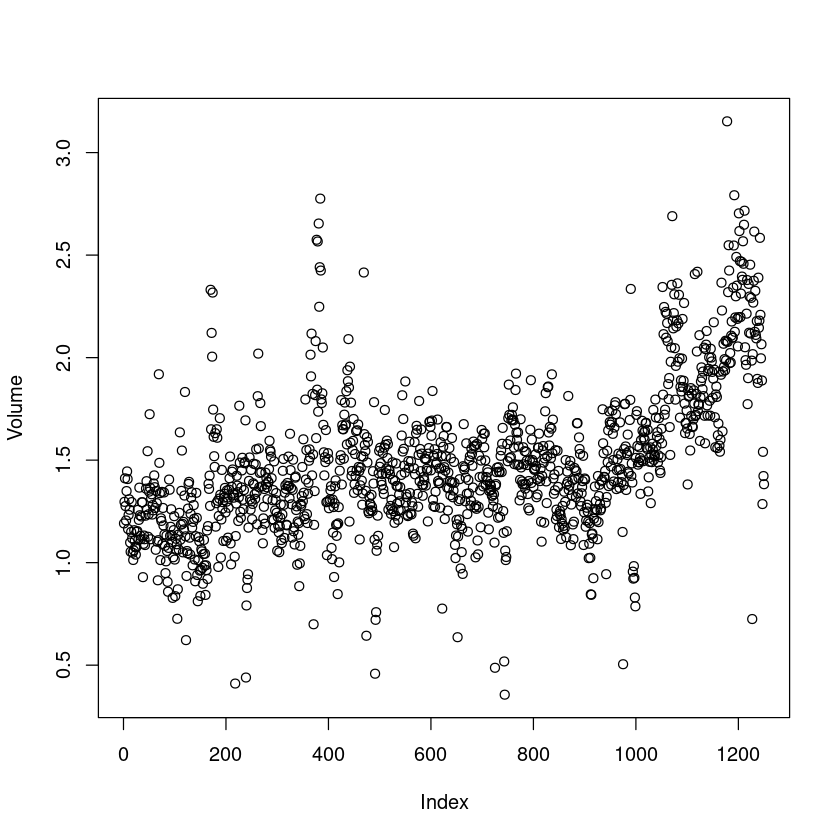

In [5]:
attach(Smarket)
plot(Volume)

## Regresión Logística
Ahora, nosotros generaremos un modelo de regresión logística para predecir *Direction* usando *Lag1* a través de *Lag5* y *Volume*. La función *glm()* fits un *modelo lineal generalizado*, una clase de modelo que incluye regresión logística. La sitaxis de *glm()* es similar a *lm()*, excepto que debemos pasar en el argumento *family=binomial* para decirla a R que usaremos regresión logística.

In [6]:
glm.fit = glm(Direction~Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


El p-value más pequeño aquí esta asociado con el ancho de Lag1. El coeficiente negativo para este predictor sugiere que si el Market tiene un retorno positivo anterior, luego es menos probable que se realize hoy día.
Nosotros podemos usar la función *cof()* para acceder solo al coeficiente para este modelo.

In [7]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [8]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


La función *predict()* puede ser usado para predecir la probabilidad que el market crecerá, dando valores a los predictores. El tipo *type="response" es opcional en R para obtener la probabilidad de la forma *P(Y=1|X)*, como opuesto a otra información como el logit.
Nosotros sabemos que estos valores corresponden par la probabilidad del market creciendo, porque la función *contrasts()* indica que R ha creado una variable vacia.

In [10]:
glm.probs = predict(glm.fit, type = "response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [11]:
contrasts(Direction)

,Up
Down,0
Up,1


Para hacer la predicción para que el market cresca o baje en un día particular, nosotros debemos convertir estas probabilidades predecidas en etiquetas de clase, *Up* y *Down*.

In [13]:
glm.pred = rep("Down", 1250)
glm.pred[glm.probs > .5] = "Up"

El primer comando crea un vector de 1 250 elementos *Down*. La segunda línea transforma a *Up* para los elementos por el cual predice la probabilidad de un incremento de 0.5. Dado esta predicción, la función *table()* puede ser usado para producir una confusión matriz para producir cuanta observaciones correctas tenemos.

In [14]:
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [15]:
(507 + 145) / 1250

[1] 0.5216

In [16]:
mean(glm.pred == Direction)

[1] 0.5216

Para implementar esta estrategia, primero crearemos un vector correspondiente para las observaciones desde 2001 hasta 2004.

In [18]:
train = (Year < 2005)
Smarket.2005 = Smarket[!train,]
dim(Smarket.2005)

[1] 252   9

In [19]:
Direction.2005 = Direction[!train]

El objeto *train* es un vector de 1 250 elementos, correspondiente de las observaciones de nuestro conjunto de datos. Los elementos del vector que corresponde que corresponden a observaciones que ocurrieron antes del 2005 son un conjunto TRUE, sin embargo estos que corresponden a observciones en 2005 son un conjunto FALSO.

Ahora nosotro crearemos un modelo de regresión logística usando solo el subconjunto de observaciones que corresponden a datos antes del 2005, usando el argumento *subset*  

In [20]:
glm.fit = glm(Direction~Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial, subset = train)
glm.probs = predict(glm.fit, Smarket.2005, type = "response")

Notar que ahora tenemos nuestro modelo entrenado y testeado sobre dos conjunto de datos completamente separado: entrenar fue realizado usando solo los datos antes del 2005, testeado fue realizado usando solo datos en 2005.

In [21]:
glm.pred = rep("Down", 252)
glm.pred[glm.probs > .5] = "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [22]:
mean(glm.pred == Direction.2005)

[1] 0.4801587

In [23]:
mean(glm.pred != Direction.2005)

[1] 0.5198413

Podemos rellamar que los regresión tuvo un comportamiento p-value asociado con todo los preditores }, que los p-value pequeños, aunque no muy pequeños, correspondieron a Lag1. Quizá removiendo las variables que aparecen no son útiles in la prediction de Direction, podemos también obtener un modelo más efectivo. Después de todo, usando predictores que no tienen una relación con la respuesta de tendencia para causar un deterioro in la prueba, y asi remover cada predictor pues mejorar.

In [24]:
glm.fit = glm(Direction~Lag1 + Lag2, data = Smarket, family = binomial, subset = train)
glm.probs = predict(glm.fit, Smarket.2005, type = "response")
glm.pred = rep("Down", 252)
glm.pred[glm.probs > .5] = "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [25]:
mean(glm.pred == Direction.2005)

[1] 0.5595238

In [26]:
106 / (106 + 76)

[1] 0.5824176

Ahora el resultado aparece para ser más prometedo: 56% de movimientos diarios han sido predecidos correctamente.

Suponer que queremos predecir los resultados asociados con valores particulares de Lag1 y Lag2. El particular, queremos predecir Direction sobre un día cuando Lang1 y Lang2 son iguales a 1.2 y 1.1, respectivamente, y sobre un día cuando ellos son iguales a 1.5 y -0.8. Esto hacemos usando la función *predict()*.

In [27]:
predict(glm.fit, newdata = data.frame(Lag1 = c(1.2, 1.5), Lag2 = c(1.1, -0.8)), type = "response")

1         2 
0.4791462 0.4960939

## Análisis de Discriminante Lineal
Ahora realizaremos LDA sobre los datos de Smarket. En R, creamos un modelo LDA usando la función *lda()*, el cual es parte de la librería MASS. Notar que la sintaxis para la función *lda()* es identico que *lm()*. 

In [28]:
library(MASS)
lda.fit = lda(Direction~Lag1 + Lag2, data = Smarket, subset = train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

La salida de LDA nos indica que el 49.2% de las observaciones entrenadas corresponden a días durante el cual el maket fue cayendo. También provee el significado de los grupos; esto son los promedios de cada predictor dentro de cada clase, y son usados por LDA como un estimado.

El *Coeffients of linear discriminants* salida provee la combinación lineal de Lag1 y Lag2 que son usados para formar la regla de decisión de LDA

La función *prediction()* retorna una lista con tres elementos. El primer elemento, *class*, contiene predicciones de LDA's a cerca de los movimiento de market. El segundo elemento, *posterior*, es un matriz de kth columnas contienen la posterior probabilidad que corresponden a la predicción que pertenece a kth.

In [29]:
lda.pred = predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [30]:
lda.class = lda.pred$class
table(lda.class, Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

In [31]:
mean(lda.class == Direction.2005)

[1] 0.5595238

Aplicando un 50% para las probabilidades posteriores nos permite recrear el contenido de las predicciones en *lda.pred$class*.

In [32]:
sum(lda.pred$posterior[,1] >= .5)

[1] 70

In [33]:
sum(lda.pred$posterior[,1] < .5)

[1] 182

Notar que la salida de probabilidad posterior por el modelo corresponde a la probabilidad del market decreciendo.

In [34]:
lda.pred$posterior[1:20,1]
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [35]:
sum(lda.pred$posterior[,1] > .9)

[1] 0

Ningún día en el 2005 se encontró que threshold fue un hecho. La probabilidad posterior más grande decreió en el 2005 fue 52.02%.

## Análisis de Discriminante Cuadrático
Ahora crearemos un modelo QDA para los datos de Market. QDA es implementado en R usando la función *qda()*, el cual también es parte de la librería MASS. La sintaxis es identica a la función *lda()*.

In [36]:
qda.fit = qda(Direction~Lag1 + Lag2, data = Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

La salida contiene el significado de los grupos. Pero no contiene los coeficientes de la discrimiannte lineal, porque el clasificador QDA involucra un cuadrático. La función *predict()* funciona exactamente es la misma forma que LDA.

In [37]:
qda.class = predict(qda.fit, Smarket.2005)$class
table(qda.class, Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

In [38]:
mean(qda.class == Direction.2005)

[1] 0.5992063

El QDA es más cuerdo que 60% del tiempo, aunque los datos del 2005 no fueron usados para el modelo. Este nivel de certeza es bastante impresivo para el stock de datos del Market, cual es conocido por ser bastante duro para modelo certeramente.

## Vecinos K-Cercanos
Ahora desarrollaremos KNN usando la función *knn()*, el cual es parte de la librería class.
1. Una matriz contiene the predictors asociado con el entrenamiento de los datos, etiquetado *train.X*.
2. La matriz contiene los predictores asociados con los datos pro el cual deseamos hacer predicciones.
3. Un vector contiene las etiquetas clases para el entrenamiento de las observasciones, etiquetado *train.Direction*.
4. Un valor para K, el numero vecino más cercano par se usado por el clasificador.


Usaremos la función *cbind()*, corto para columnas bind, para cegar las variables Lag1 y Lag2 junto en dos matrices, uno para entrenar el conjunto de datos y el otros para hacer las pruebas.

In [39]:
library(class)
train.X = cbind(Lag1, Lag2)[train,]
test.X = cbind(Lag1, Lag2)[!train,]
train.Direction = Direction[train]

Ahora la función *knn()* puede ser usado para predecir los movimiento de market para los datos del 2005. Nosotros configuraremos las semillas de forma random para después aplicar *knn()* porque si varias observaciones son llegados a nun vecino cercano.

In [40]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

In [41]:
(83 + 43) / 252

[1] 0.5

Los resultados usando K = 1 no son muy buenos, ya que solo el 50% de las obsevaciones son correctamente predecidos. Por supuesto, podría ser que K = 1 resulta en un arreglo de dato flexible.

In [43]:
knn.pred = knn(train.X, test.X, train.Direction, k = 3)
table(knn.pred, Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

In [44]:
mean(knn.pred == Direction.2005)

[1] 0.5357143

## Una Aplicación para Datos de Caravan Insurance
Finalmente, aplicaremos el acercamiento KNN para el *Caravan*, el cual es parte de la librería ISLR. Este conjunto de datos incluyen 85 predictores que miden las características demográficas para 5 822 individuos. La variable responsable es *Purchase*, el cual indica que no dan una venta individual a un caravan insurance.

In [45]:
dim(Caravan)

[1] 5822   86

In [46]:
attach(Caravan)
summary(Purchase)

No  Yes 
5474  348

In [47]:
384 / 5822

[1] 0.06595672

Porque el clasificador KNN predice que las clase dado para pruebas de observaciones  por un identificador son más cercanos, las escalas de las variables importan. Cualquier variable que están sobre una escala larga tendrán un efecto más largo sobre la distancia entre las obsrvaciones, y acerca sobre el clasificador KNN.

Una buena forma de manejar este problema para estandarizar los datos, de esta manera todas las variables nos daran un significado de cero y estandarizar la desviación de uno. La función *scale()* justamente hace esto.

In [48]:
standardized.X = scale(Caravan[, -86])
var(Caravan[,1])

[1] 165.0378

In [49]:
var(Caravan[,2])

[1] 0.1647078

In [50]:
var(standardized.X[,1])

[1] 1

In [51]:
var(standardized.X[,2])

[1] 1

Ahora cada columna de *standardized.X* tiene una desviation standard de uno y un significado de cero.

Arreglaremos el modelo KNN sobre el entrenamiento de dato usando K = 1, y evaluamos su desarrollo sobre data test.

In [52]:
test = 1:1000
train.X = standardized.X[-test,]
test.X = standardized.X[test,]
train.Y = Purchase[-test]
test.Y = Purchase[test]
set.seed(1)
knn.pred = knn(train.X, test.X, train.Y, k = 1)
mean(test.Y != knn.pred)

[1] 0.118

In [53]:
mean(test.Y != "No")

[1] 0.059

El vector *test* es numérico, con valores desde 1 hasta 1 000.

Cambiar el KNN con K = 1 hace mucho mejor la incetidumbre para los clientes que son predecidos para comprar.

In [54]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

In [55]:
9 / (68 + 9)

[1] 0.1168831

Usando K = 3, el radio de éxito crece a 19%, y con K = 5, el radio es 26.7%. Esto es cuatro veces que el resultado de una incertidumbre random.

In [57]:
knn.pred = knn(train.X, test.X, train.Y, k = 3)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  922  54
     Yes  19   5

In [58]:
5 / 26

[1] 0.1923077

In [59]:
knn.pred = knn(train.X, test.X, train.Y, k = 5)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

In [60]:
4 / 15

[1] 0.2666667

Una comparación, que podemos hacer es arreglar un modelo de regresión lineal para los datos. Si nosotros usamos 0.5 como una probabilidad de predicción para el clasificador, luego tendremos un problema: solo siete de las pruebas a las observaciones son predecidas para comprar con seguridad.

In [61]:
glm.fit = glm(Purchase~., data = Caravan, family = binomial, subset = -test)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [62]:
glm.probs = predict(glm.fit, Caravan[test,], type = "response")
glm.pred = rep("No", 1000)
glm.pred[glm.probs > .5] = "Yes"
table(glm.pred,test.Y)

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

In [63]:
glm.pred = rep("No", 1000)
glm.pred[glm.probs > .25] = "Yes"
table(glm.pred, test.Y)

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

In [64]:
11 / (22 + 11)

[1] 0.3333333